<a href="https://colab.research.google.com/github/shumyyla/test/blob/master/linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import scipy
from matplotlib import pyplot as plt
from matplotlib import image
import sklearn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.linalg

v1 =  [3 1]
v2 =  [3 1]


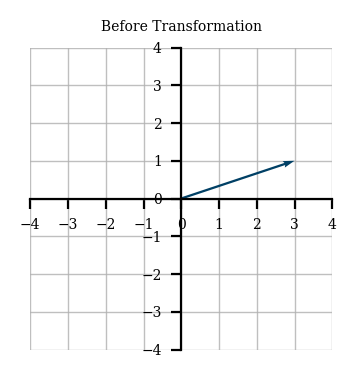

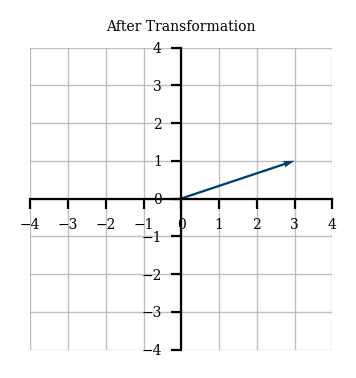

In [ ]:
%matplotlib inline
v1 = np.array([3, 1])
A = np.array([[1, 0], [0, 1]])
v2 = np.dot(A, v1)

print("v1 = ", v1)
print("v2 = ", v2)

plot_vector([v1])
pyplot.title("Before Transformation")

plot_vector([v2])
pyplot.title("After Transformation");

[[ 1  1]
 [-1  1]]


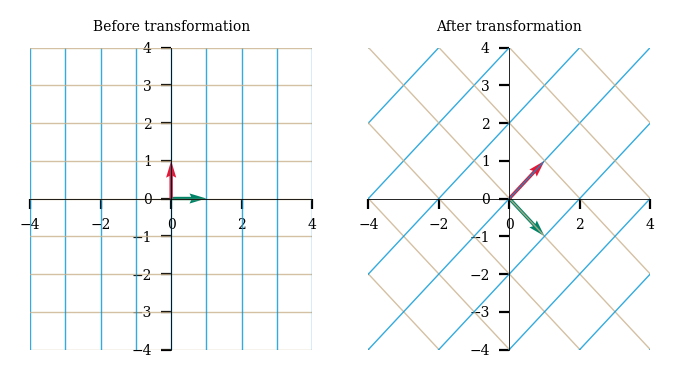

In [ ]:
A = numpy.array([[1,1], [-1,1]])
print(A)
plot_linear_transformation(A)

In [ ]:
# @title Plotting functions
import numpy
from numpy.linalg import inv, eig
from math import ceil
from matplotlib import pyplot, ticker, get_backend, rc
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle

def plot_range_3_by_2_matrix(matrix):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Make data

    x = []
    y = []
    z = []
    for a1 in range(-10, 10, 1):
      for a2 in range(-10, 10, 1):
          vec = a1*matrix[:,0]+a2*matrix[:,1]
          x1, y1, z1 = vec
          x.append(x1)
          y.append(y1)
          z.append(z1)

    ax.scatter(np.array(x), np.array(y), np.array(z), color='b')

def plot_null_2_by_3_matrix(matrix):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Make data

    basis = scipy.linalg.null_space(matrix)
    x = []
    y = []
    z = []
    for a1 in range(-10, 10, 1):
      for a2 in range(-10, 10, 1):

          vec = a1*basis[:,0]
          if basis.shape[1]==2:
            vec += a2*basis[:,1]
          x1, y1, z1 = vec
          x.append(x1)
          y.append(y1)
          z.append(z1)

    ax.scatter(np.array(x), np.array(y), np.array(z), color='b')


_int_backends = ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg',
                 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo',
                 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo']
_backend = get_backend()   # get current backend name

# shrink figsize and fontsize when using %matplotlib notebook
if _backend in _int_backends:
    fontsize = 4
    fig_scale = 0.75
else:
    fontsize = 5
    fig_scale = 1

grey = '#808080'
gold = '#cab18c'   # x-axis grid
lightblue = '#0096d6'  # y-axis grid
green = '#008367'  # x-axis basis vector
red = '#E31937'    # y-axis basis vector
darkblue = '#004065'

pink, yellow, orange, purple, brown = '#ef7b9d', '#fbd349', '#ffa500', '#a35cff', '#731d1d'

quiver_params = {'angles': 'xy',
                 'scale_units': 'xy',
                 'scale': 1,
                 'width': 0.012}

grid_params = {'linewidth': 0.5,
               'alpha': 0.8}

def set_rc(func):
    def wrapper(*args, **kwargs):
        rc('font', family='serif', size=fontsize)
        rc('figure', dpi=200)
        rc('axes', axisbelow=True, titlesize=5)
        rc('lines', linewidth=1)
        func(*args, **kwargs)
    return wrapper

@set_rc
def plot_vector(vectors, tails=None):
    ''' Draw 2d vectors based on the values of the vectors and the position of their tails.
    
    Parameters
    ----------
    vectors : list.
        List of 2-element array-like structures, each represents a 2d vector.
    
    tails : list, optional.
        List of 2-element array-like structures, each represents the coordinates of the tail
        of the corresponding vector in vectors. If None (default), all tails are set at the
        origin (0,0). If len(tails) is 1, all tails are set at the same position. Otherwise,
        vectors and tails must have the same length.
    
    Examples
    --------
    >>> v = [(1, 3), (3, 3), (4, 6)]
    >>> plot_vector(v)      # draw 3 vectors with their tails at origin
    >>> t = [numpy.array((2, 2))]
    >>> plot_vector(v, t)   # draw 3 vectors with their tails at (2,2)
    >>> t = [[3, 2], [-1, -2], [3, 5]]
    >>> plot_vector(v, t)   # draw 3 vectors with 3 different tails

    '''   
    vectors = numpy.array(vectors)
    assert vectors.shape[1] == 2, "Each vector should have 2 elements."  
    if tails is not None:
        tails = numpy.array(tails)
        assert tails.shape[1] == 2, "Each tail should have 2 elements."
    else:
        tails = numpy.zeros_like(vectors)
    
    # tile vectors or tails array if needed
    nvectors = vectors.shape[0]
    ntails = tails.shape[0]
    if nvectors == 1 and ntails > 1:
        vectors = numpy.tile(vectors, (ntails, 1))
    elif ntails == 1 and nvectors > 1:
        tails = numpy.tile(tails, (nvectors, 1))
    else:
        assert tails.shape == vectors.shape, "vectors and tail must have a same shape"

    # calculate xlimit & ylimit
    heads = tails + vectors
    limit = numpy.max(numpy.abs(numpy.hstack((tails, heads))))
    limit = numpy.ceil(limit * 1.2)   # add some margins
    
    figsize = numpy.array([2,2]) * fig_scale
    figure, axis = pyplot.subplots(figsize=figsize)
    axis.quiver(tails[:,0], tails[:,1], vectors[:,0], vectors[:,1], color=darkblue, 
                  angles='xy', scale_units='xy', scale=1)
    axis.set_xlim([-limit, limit])
    axis.set_ylim([-limit, limit])
    axis.set_aspect('equal')

    # if xticks and yticks of grid do not match, choose the finer one
    xticks = axis.get_xticks()
    yticks = axis.get_yticks()
    dx = xticks[1] - xticks[0]
    dy = yticks[1] - yticks[0]
    base = max(int(min(dx, dy)), 1)   # grid interval is always an integer
    loc = ticker.MultipleLocator(base=base)
    axis.xaxis.set_major_locator(loc)
    axis.yaxis.set_major_locator(loc)
    axis.grid(True, **grid_params)
    
    # show x-y axis in the center, hide frames
    axis.spines['left'].set_position('center')
    axis.spines['bottom'].set_position('center')
    axis.spines['right'].set_color('none')
    axis.spines['top'].set_color('none')

@set_rc
def plot_transformation_helper(axis, matrix, *vectors, unit_vector=True, unit_circle=False, title=None):
    """ A helper function to plot the linear transformation defined by a 2x2 matrix.
    
    Parameters
    ----------
    axis : class matplotlib.axes.Axes.
        The axes to plot on.

    matrix : class numpy.ndarray.
        The 2x2 matrix to visualize.

    *vectors : class numpy.ndarray.
        The vector(s) to plot along with the linear transformation. Each array denotes a vector's
        coordinates before the transformation and must have a shape of (2,). Accept any number of vectors. 
    
    unit_vector : bool, optional.
        Whether to plot unit vectors of the standard basis, default to True.
    
    unit_circle: bool, optional.
        Whether to plot unit circle, default to False.
    
    title: str, optional.
        Title of the plot.

    """
    assert matrix.shape == (2,2), "the input matrix must have a shape of (2,2)"
    grid_range = 20
    x = numpy.arange(-grid_range, grid_range+1)
    X_, Y_ = numpy.meshgrid(x,x)
    I = matrix[:,0]
    J = matrix[:,1]
    X = I[0]*X_ + J[0]*Y_
    Y = I[1]*X_ + J[1]*Y_
    origin = numpy.zeros(1)
        
    # draw grid lines
    for i in range(x.size):
        axis.plot(X[i,:], Y[i,:], c=gold, **grid_params)
        axis.plot(X[:,i], Y[:,i], c=lightblue, **grid_params)
    
    # draw (transformed) unit vectors
    if unit_vector:
        axis.quiver(origin, origin, [I[0]], [I[1]], color=green, **quiver_params)
        axis.quiver(origin, origin, [J[0]], [J[1]], color=red, **quiver_params)

    # draw optional vectors
    color_cycle = cycle([pink, darkblue, orange, purple, brown])
    if vectors:
        for vector in vectors:
            color = next(color_cycle)
            vector_ = matrix @ vector.reshape(-1,1)
            axis.quiver(origin, origin, [vector_[0]], [vector_[1]], color=color, **quiver_params)

    # draw optional unit circle
    if unit_circle:
        alpha =  numpy.linspace(0, 2*numpy.pi, 41)
        circle = numpy.vstack((numpy.cos(alpha), numpy.sin(alpha)))
        circle_trans = matrix @ circle
        axis.plot(circle_trans[0], circle_trans[1], color=red, lw=0.8)

    # hide frames, set xlimit & ylimit, set title
    limit = 4
    axis.spines['left'].set_position('center')
    axis.spines['bottom'].set_position('center')
    axis.spines['left'].set_linewidth(0.3)
    axis.spines['bottom'].set_linewidth(0.3)
    axis.spines['right'].set_color('none')
    axis.spines['top'].set_color('none')
    axis.set_xlim([-limit, limit])
    axis.set_ylim([-limit, limit])
    if title is not None:
        axis.set_title(title)

@set_rc
def plot_linear_transformation(matrix, *vectors, unit_vector=True, unit_circle=False):
    """ Plot the linear transformation defined by a 2x2 matrix using the helper
    function plot_transformation_helper(). It will create 2 subplots to visualize some
    vectors before and after the transformation.
    
    Parameters
    ----------
    matrix : class numpy.ndarray.
        The 2x2 matrix to visualize.

    *vectors : class numpy.ndarray.
        The vector(s) to plot along with the linear transformation. Each array denotes a vector's
        coordinates before the transformation and must have a shape of (2,). Accept any number of vectors.
    
    unit_vector : bool, optional.
        Whether to plot unit vectors of the standard basis, default to True.
    
    unit_circle: bool, optional.
        Whether to plot unit circle, default to False.
    
    """
    figsize = numpy.array([4,2]) * fig_scale
    figure, (axis1, axis2) = pyplot.subplots(1, 2, figsize=figsize)
    plot_transformation_helper(axis1, numpy.identity(2), *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='Before transformation')
    plot_transformation_helper(axis2, matrix, *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='After transformation')

@set_rc
def plot_linear_transformations(*matrices, unit_vector=True, unit_circle=False):
    """ Plot the linear transformation defined by a sequence of n 2x2 matrices using the helper
    function plot_transformation_helper(). It will create n+1 subplots to visualize some
    vectors before and after each transformation.

    Parameters
    ----------
    *matrices : class numpy.ndarray.
        The 2x2 matrices to visualize. Accept any number of matrices.
    
    unit_vector : bool, optional.
        Whether to plot unit vectors of the standard basis, default to True.
    
    unit_circle: bool, optional.
        Whether to plot unit circle, default to False.
      
    """
    nplots = len(matrices) + 1
    nx = 2
    ny = ceil(nplots/nx)
    figsize = numpy.array([2*nx, 2*ny]) * fig_scale
    figure, axes = pyplot.subplots(nx, ny, figsize=figsize)

    for i in range(nplots):  # fig_idx 
        if i == 0:
            matrix_trans = numpy.identity(2)
            title = 'Before transformation'
        else:
            matrix_trans = matrices[i-1] @ matrix_trans
            if i == 1:
                title = 'After {} transformation'.format(i)
            else:
                title = 'After {} transformations'.format(i)
        plot_transformation_helper(axes[i//nx, i%nx], matrix_trans, unit_vector=unit_vector, unit_circle=unit_circle, title=title)
    # hide axes of the extra subplot (only when nplots is an odd number)
    if nx*ny > nplots:
        axes[-1,-1].axis('off')
        

v1 =  [3 1]
v2 =  [6 4]


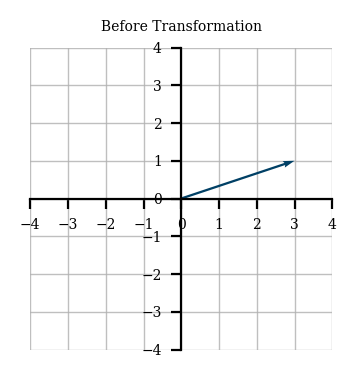

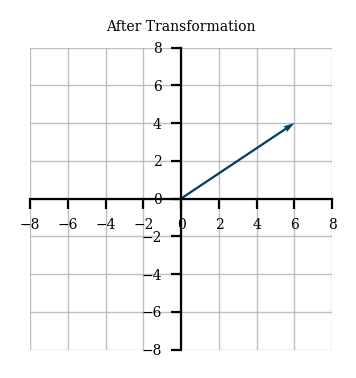

In [ ]:
v1 = np.array([3, 1])
A = np.array([[2, 0], [0, 4]])
v2 = np.dot(A, v1)

print("v1 = ", v1)
print("v2 = ", v2)

plot_vector([v1])
pyplot.title("Before Transformation")

plot_vector([v2])
pyplot.title("After Transformation");

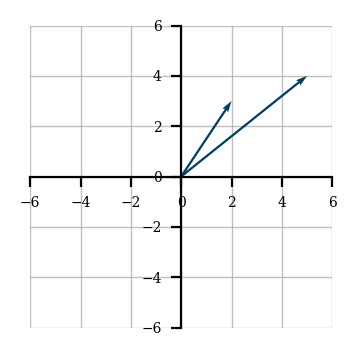

In [ ]:
v=[(2,3),(5,4)]
plot_vector(v)

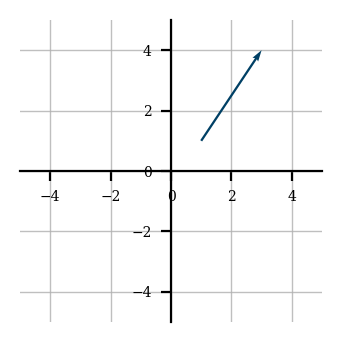

In [ ]:
v = [(2,3)]
tail = [(1,1)]
plot_vector(v ,tail)

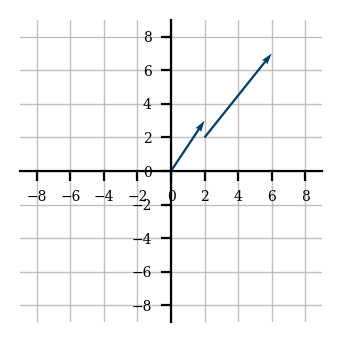

In [ ]:
v = [(2,3),(4,5)]
tail = [(0,0),(2,2)]
plot_vector(v ,tail)